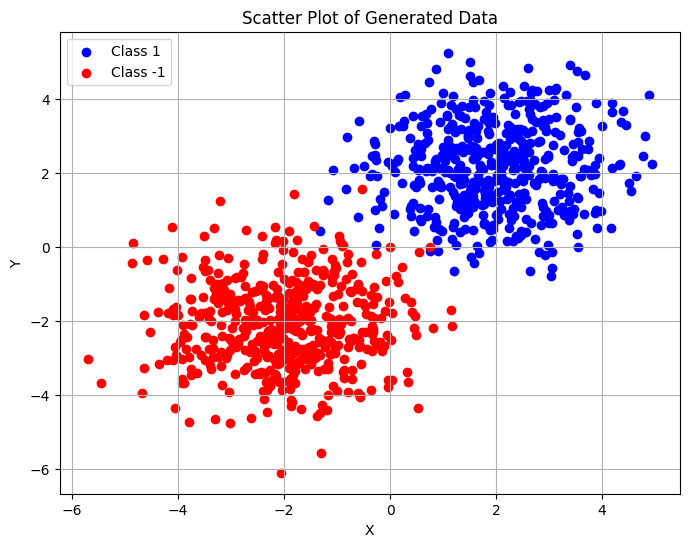

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate 2D data points from two Gaussian distributions
def classifyTwoGaussData(numSamples: int, noise: float):
    points = []

    # Function to generate Gaussian data points
    def genGauss(cx: float, cy: float, label: int):
        varianceScale = lambda x: 0.5 + x * 3.5  # Scale the variance based on 'noise'
        variance = varianceScale(noise)

        for i in range(numSamples // 2):
            x = np.random.normal(cx, variance)
            y = np.random.normal(cy, variance)
            points.append({"x": x, "y": y, "label": label})

    # Generate data points for Gaussian distributions
    genGauss(2, 2, 1)     # Gaussian with positive examples.
    genGauss(-2, -2, -1)  # Gaussian with negative examples.
    return points

# Generate data
numSamples = 1000
noise = 0.2
generated_data = classifyTwoGaussData(numSamples, noise)

# Separate data points and labels for plotting
data_points = np.array([(point["x"], point["y"]) for point in generated_data])
labels = np.array([point["label"] for point in generated_data])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data_points[labels == 1, 0], data_points[labels == 1, 1], c='b', label='Class 1')
plt.scatter(data_points[labels == -1, 0], data_points[labels == -1, 1], c='r', label='Class -1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Generated Data')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def mlp_model(architecture_info, input_dim):
    model = Sequential()
    model.add(Dense(architecture_info[0]['neurons'], input_dim=input_dim, activation=architecture_info[0]['activation']))
    for i in range(1, len(architecture_info)):
        model.add(Dense(architecture_info[i]['neurons'], activation=architecture_info[i]['activation']))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [3]:
architecture_info = [{'neurons': 64, 'activation': 'relu'}, {'neurons': 64, 'activation': 'relu'}, {'neurons': 1, 'activation': 'sigmoid'}]
input_dim = 2
model = mlp_model(architecture_info, input_dim)
model.fit(data_points, labels, epochs=150, batch_size=10)


Epoch 1/150
100/100 [==============================] - 0s 338us/step - loss: -4.2987 - accuracy: 0.4930
Epoch 2/150
100/100 [==============================] - 0s 304us/step - loss: -49.6067 - accuracy: 0.4880
Epoch 3/150
100/100 [==============================] - 0s 325us/step - loss: -227.6985 - accuracy: 0.4840
Epoch 4/150
100/100 [==============================] - 0s 320us/step - loss: -665.6616 - accuracy: 0.4840
Epoch 5/150
100/100 [==============================] - 0s 324us/step - loss: -1470.6320 - accuracy: 0.4850
Epoch 6/150
100/100 [==============================] - 0s 334us/step - loss: -2752.0303 - accuracy: 0.4860
Epoch 7/150
100/100 [==============================] - 0s 305us/step - loss: -4582.1143 - accuracy: 0.4860
Epoch 8/150
100/100 [==============================] - 0s 328us/step - loss: -7033.1787 - accuracy: 0.4860
Epoch 9/150
100/100 [==============================] - 0s 313us/step - loss: -10185.5547 - accuracy: 0.4860
Epoch 10/150
100/100 [=====================

313/313 [==============================] - 0s 210us/step


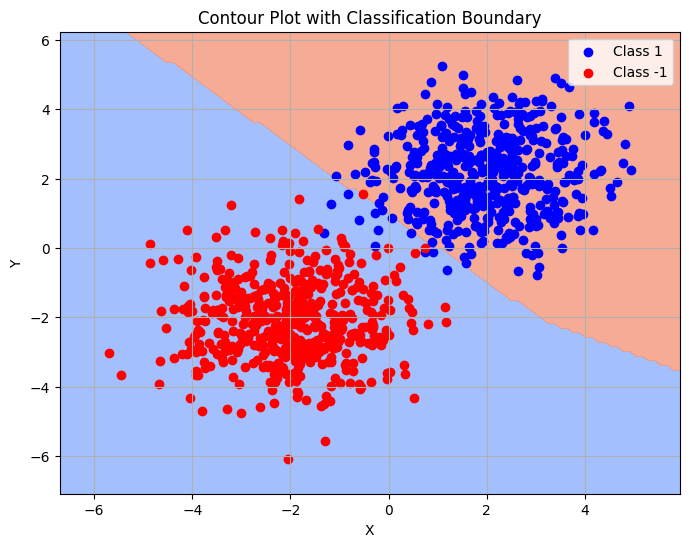

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code to create the data_points and labels)

# Create a meshgrid to cover the entire range of the data space
x_min, x_max = data_points[:, 0].min() - 1, data_points[:, 0].max() + 1
y_min, y_max = data_points[:, 1].min() - 1, data_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten the meshgrid points and make predictions for each point
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(grid_points)

# Reshape the predictions to match the shape of the meshgrid
zz = predictions.reshape(xx.shape)

# Plot the contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.8)
plt.scatter(data_points[labels == 1, 0], data_points[labels == 1, 1], c='b', label='Class 1')
plt.scatter(data_points[labels == -1, 0], data_points[labels == -1, 1], c='r', label='Class -1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot with Classification Boundary')
plt.legend()
plt.grid(True)
plt.show()